<a href="https://colab.research.google.com/github/datawithibrahim/Retail-Data-Analysis-/blob/main/retail_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

My main objective of this project  is To analyze retail sales data, map products to categories, and extract actionable insights on consumer purchasing behavior, revenue trends, and product preferences. The goal is to support decision-making for retail and brand customers by providing accurate, high-quality product attribution.

**Tools & Skills Used:**

* ython (Pandas, NumPy, Matplotlib, Seaborn)


* SQLite (for querying product and sales data)

* Data Analysis & Visualization

* Product Mapping and Segmentation

* Retail Data Interpretation

* Key Skills Demonstrated: Attention to Detail, Problem-Solving, SQL, Python

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/customer_shopping_data.csv', parse_dates=['invoice_date'], dayfirst=True)

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [ ]:
df.isna().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [ ]:
df['revenue'] = df['quantity'] * df['price']

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


In [ ]:
df['quantity'] = df['quantity'].astype(int)
df['price'] = df['price'].astype(float)

In [ ]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
print(category_revenue)

# in this code first i have displayed the categorywise revenue in the ascending order

category
Clothing           1.139968e+08
Shoes              6.655345e+07
Technology         5.786235e+07
Cosmetics          6.792863e+06
Toys               3.980426e+06
Food & Beverage    8.495351e+05
Books              8.345529e+05
Souvenir           6.358247e+05
Name: revenue, dtype: float64


/tmp/ipython-input-2763277766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")


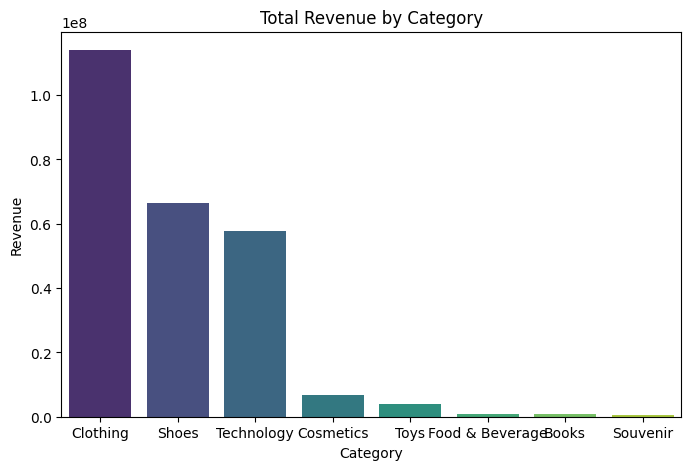

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")
plt.title('Total Revenue by Category')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.show()

# simple bar plot the categorywise revenue

gender
Female    1.502071e+08
Male      1.012987e+08
Name: revenue, dtype: float64


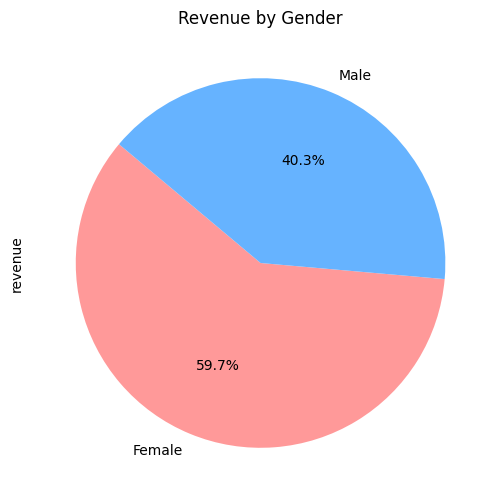

In [ ]:
gender_revenue = df.groupby('gender')['revenue'].sum()
print(gender_revenue)

gender_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Revenue by Gender')
plt.show()


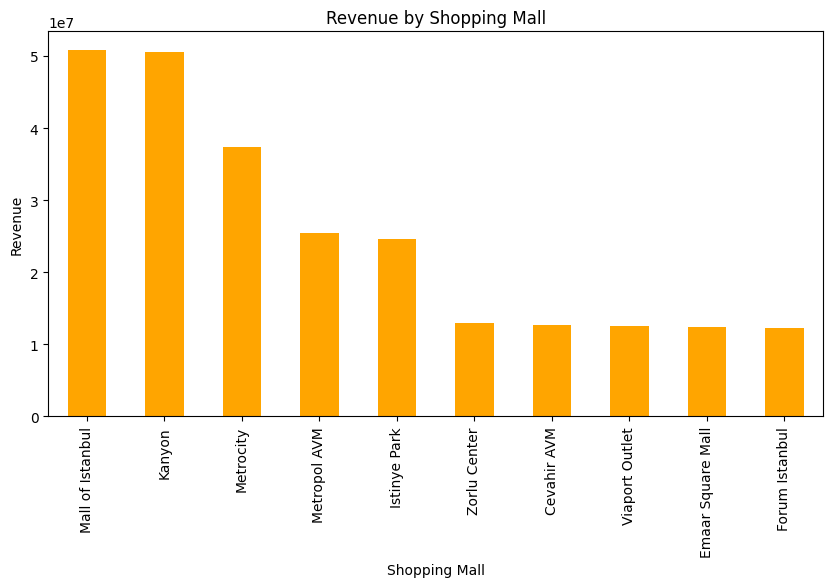

In [ ]:
mall_revenue = df.groupby('shopping_mall')['revenue'].sum().sort_values(ascending=False)
mall_revenue.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Revenue by Shopping Mall')
plt.ylabel('Revenue')
plt.xlabel('Shopping Mall')
plt.show()


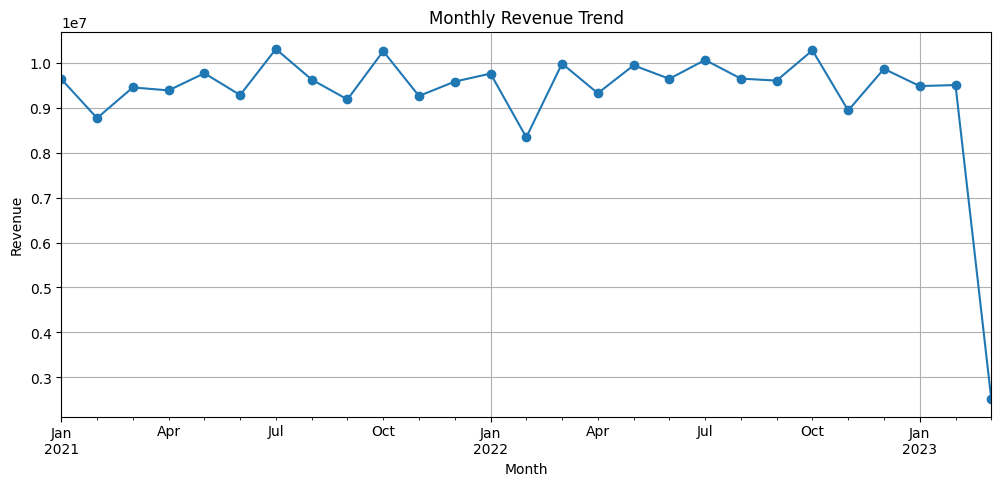

In [ ]:
df['month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum()
monthly_revenue.plot(kind='line', marker='o', figsize=(12,5))
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.show()

# monthly revenue trends

In [ ]:
import re

def map_subcategory(row):
    if row['category'] == 'Clothing':
        if re.search(r'tshirt|shirt|top', row['category'], re.IGNORECASE):
            return 'Topwear'
        elif re.search(r'trousers|jeans|pants', row['category'], re.IGNORECASE):
            return 'Bottomwear'
    return row['category']

df['subcategory'] = df.apply(map_subcategory, axis=1)
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue,month,subcategory
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08,Clothing
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,Shoes
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11,Clothing
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,Shoes
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,Books


In [ ]:
# Total revenue by category
category_revenue = df.groupby('category')['revenue'].sum()
print(category_revenue)

# Total revenue by gender
gender_revenue = df.groupby('gender')['revenue'].sum()
print(gender_revenue)

# Total revenue by shopping mall
mall_revenue = df.groupby('shopping_mall')['revenue'].sum()
print(mall_revenue)


category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: revenue, dtype: float64
gender
Female    1.502071e+08
Male      1.012987e+08
Name: revenue, dtype: float64
shopping_mall
Cevahir AVM          12645138.20
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Istinye Park         24618827.68
Kanyon               50554231.10
Mall of Istanbul     50872481.68
Metrocity            37302787.33
Metropol AVM         25379913.19
Viaport Outlet       12521339.72
Zorlu Center         12901053.82
Name: revenue, dtype: float64


In [ ]:
df.to_csv('retail_data_cleaned.csv', index=False)


In [ ]:
category_sales = df.groupby('category')['quantity'].sum().reset_index()

In [ ]:
category_sales_sorted = category_sales.sort_values(by='quantity', ascending=False)


In [ ]:
category_sales_sorted.head()

,category,quantity
1,Clothing,103558
2,Cosmetics,45465
3,Food & Beverage,44277
7,Toys,30321
4,Shoes,30217


In [ ]:
# Calculate total spending per customer
customer_spending = df.groupby('customer_id')['revenue'].sum().reset_index()

# Define spending tiers
bins = [0, 500, 1000, 5000, float('inf')]
labels = ['Low', 'Medium', 'High', 'VIP']
customer_spending['spending_tier'] = pd.cut(customer_spending['revenue'], bins=bins, labels=labels)

# Display the first few entries
customer_spending.head()


,customer_id,revenue,spending_tier
0,C100004,7502.00,VIP
1,C100005,2400.68,High
2,C100006,322.56,Low
3,C100012,130.75,Low
4,C100019,35.84,Low


In [ ]:
# Calculate ATV
atv = df['revenue'].mean()

# Display the result
print(f"Average Transaction Value: ₹{atv:.2f}")


Average Transaction Value: ₹2528.79


In [ ]:
# Save the dataframe to a new CSV file
df.to_csv('cleaned_retail_data.csv', index=False)


In [ ]:
# I have used simple python logic to map the product by its category

def map_product_category(category):
    if category == 'Clothing':
        return 'Apparel'
    elif category == 'Shoes':
        return 'Footwear'
    elif category == 'Books':
        return 'Reading Material'
    else:
        return 'Other'

# Apply the mapping
df['product_mapped'] = df['category'].apply(map_product_category)

# Check the results
print(df[['category','product_mapped']])


              category    product_mapped
0             Clothing           Apparel
1                Shoes          Footwear
2             Clothing           Apparel
3                Shoes          Footwear
4                Books  Reading Material
...                ...               ...
99452         Souvenir             Other
99453  Food & Beverage             Other
99454  Food & Beverage             Other
99455       Technology             Other
99456         Souvenir             Other

[99457 rows x 2 columns]


product_mapped
Other               49955
Apparel             34487
Footwear            10034
Reading Material     4981
Name: count, dtype: int64


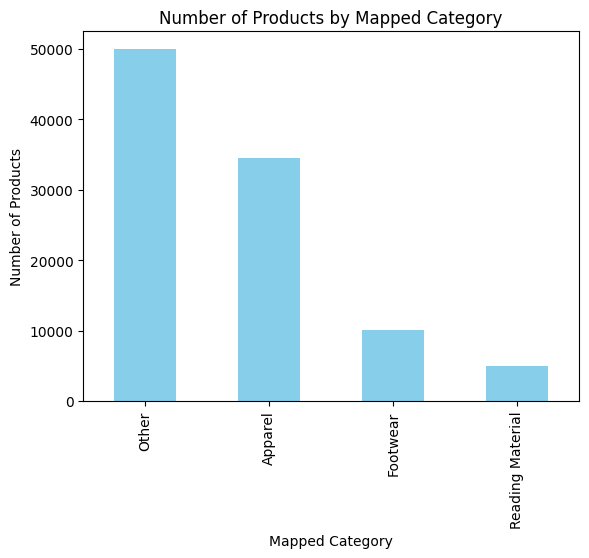

In [ ]:
# Count how many products fall in each mapped category
mapped_counts = df['product_mapped'].value_counts()
print(mapped_counts)

# bar chart
mapped_counts.plot(kind='bar', title='Number of Products by Mapped Category', color='skyblue')
plt.xlabel('Mapped Category')
plt.ylabel('Number of Products')
plt.show()


product_mapped
Apparel             1.139968e+08
Footwear            6.655345e+07
Other               7.012100e+07
Reading Material    8.345529e+05
Name: revenue, dtype: float64


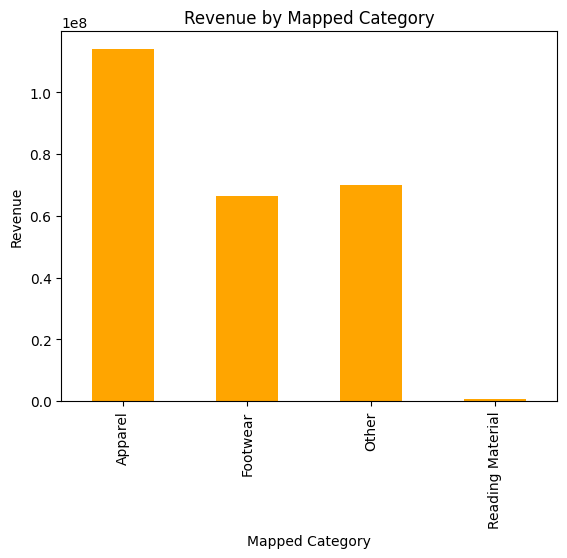

In [ ]:
# Sum revenue for each mapped category
mapped_revenue = df.groupby('product_mapped')['revenue'].sum()
print(mapped_revenue)

# Bar chart visualization
mapped_revenue.plot(kind='bar', title='Revenue by Mapped Category', color='orange')
plt.xlabel('Mapped Category')
plt.ylabel('Revenue')
plt.show()


In [ ]:
def price_tier(price):
    if price < 500:
        return 'Low'
    elif price < 2000:
        return 'Medium'
    else:
        return 'High'

df['price_tier'] = df['price'].apply(price_tier)
print(df[['category','price','price_tier']])


              category    price price_tier
0             Clothing  1500.40     Medium
1                Shoes  1800.51     Medium
2             Clothing   300.08        Low
3                Shoes  3000.85       High
4                Books    60.60        Low
...                ...      ...        ...
99452         Souvenir    58.65        Low
99453  Food & Beverage    10.46        Low
99454  Food & Beverage    10.46        Low
99455       Technology  4200.00       High
99456         Souvenir    35.19        Low

[99457 rows x 3 columns]


In [ ]:
def quantity_tier(qty):
    if qty <= 2:
        return 'Low Demand'
    elif qty <= 5:
        return 'Medium Demand'
    else:
        return 'High Demand'

df['demand_tier'] = df['quantity'].apply(quantity_tier)
print(df[['category','quantity','demand_tier']])


              category  quantity    demand_tier
0             Clothing         5  Medium Demand
1                Shoes         3  Medium Demand
2             Clothing         1     Low Demand
3                Shoes         5  Medium Demand
4                Books         4  Medium Demand
...                ...       ...            ...
99452         Souvenir         5  Medium Demand
99453  Food & Beverage         2     Low Demand
99454  Food & Beverage         2     Low Demand
99455       Technology         4  Medium Demand
99456         Souvenir         3  Medium Demand

[99457 rows x 3 columns]


In [ ]:
payment_pref = df.groupby(['product_mapped','payment_method'])['revenue'].sum().unstack()
print(payment_pref)


payment_method           Cash  Credit Card   Debit Card
product_mapped                                         
Apparel           51308878.72  39351590.96  23336321.36
Footwear          29782836.08  23560873.69  13209741.70
Other             31360581.37  24884050.82  13876366.65
Reading Material    379946.85    280608.30    173997.75


In [ ]:
gender_pref = df.groupby(['product_mapped','gender'])['revenue'].sum().unstack()
print(gender_pref)


gender                 Female         Male
product_mapped                            
Apparel           68251695.60  45745095.44
Footwear          39425167.30  27128284.17
Other             42040958.42  28080040.42
Reading Material    489314.70    345238.20


In [ ]:
mall_pref = df.groupby(['shopping_mall','product_mapped'])['revenue'].sum().unstack()
print(mall_pref)


product_mapped         Apparel     Footwear        Other  Reading Material
shopping_mall                                                             
Cevahir AVM         5706321.28   3243918.85   3650357.07          44541.00
Emaar Square Mall   5590490.40   3089675.16   3683938.93          41995.80
Forum Istanbul      5792444.24   3327942.65   3141477.95          42056.40
Istinye Park       11253900.24   6641481.22   6647362.92          76083.30
Kanyon             22609527.60  13383190.83  14398483.52         163029.15
Mall of Istanbul   22947417.68  13467814.80  14285008.85         172240.35
Metrocity          17226692.56   9519296.37  10430886.75         125911.65
Metropol AVM       11568084.00   7149825.21   6578285.08          83718.90
Viaport Outlet      5604594.16   3194704.91   3682408.25          39632.40
Zorlu Center        5697318.88   3535601.47   3622789.52          45343.95


In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect(':memory')

In [ ]:
# Make sure invoice_date is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Create month_year column
df['month_year'] = df['invoice_date'].dt.to_period('M')

# Convert to string for SQLite
df['month_year'] = df['month_year'].astype(str)


In [ ]:
# Check column types
print(df.dtypes)


invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
revenue                  float64
month                  period[M]
subcategory               object
product_mapped            object
price_tier                object
demand_tier               object
month_year                object
dtype: object


In [ ]:
for col in df.columns:
    if str(df[col].dtype).startswith('period'):
        df[col] = df[col].astype(str)


In [ ]:
import sqlite3

conn = sqlite3.connect(':memory:')
df.to_sql('customer_shopping_data', conn, index=False, if_exists='replace')


99457

In [ ]:
query = """
select * from customer_shopping_data
"""
data = pd.read_sql_query(query, conn)
print(data)

      invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method       

In [ ]:
query = """
SELECT category, SUM(quantity) AS total_quantity, SUM(price*quantity) AS total_revenue
FROM customer_shopping_data
GROUP BY category
ORDER BY total_quantity DESC
"""
top_products = pd.read_sql_query(query, conn)
print(top_products)


          category  total_quantity  total_revenue
0         Clothing          103558   1.139968e+08
1        Cosmetics           45465   6.792863e+06
2  Food & Beverage           44277   8.495351e+05
3             Toys           30321   3.980426e+06
4            Shoes           30217   6.655345e+07
5       Technology           15021   5.786235e+07
6            Books           14982   8.345529e+05
7         Souvenir           14871   6.358246e+05


In [ ]:
query = """
SELECT payment_method, SUM(price*quantity) AS total_revenue
FROM customer_shopping_data
GROUP BY payment_method
ORDER BY total_revenue DESC
"""
payment_revenue = pd.read_sql_query(query, conn)
print(payment_revenue)


  payment_method  total_revenue
0           Cash   1.128322e+08
1    Credit Card   8.807712e+07
2     Debit Card   5.059643e+07


In [ ]:
query = """
SELECT payment_method, SUM(price*quantity) AS total_revenue
FROM customer_shopping_data
GROUP BY payment_method
ORDER BY total_revenue DESC
"""
payment_revenue = pd.read_sql_query(query, conn)
print(payment_revenue)


  payment_method  total_revenue
0           Cash   1.128322e+08
1    Credit Card   8.807712e+07
2     Debit Card   5.059643e+07


In [ ]:
query = """
SELECT shopping_mall, SUM(price*quantity) AS total_revenue
FROM customer_shopping_data
GROUP BY shopping_mall
ORDER BY total_revenue DESC
"""
mall_revenue = pd.read_sql_query(query, conn)
print(mall_revenue)


       shopping_mall  total_revenue
0   Mall of Istanbul   5.087248e+07
1             Kanyon   5.055423e+07
2          Metrocity   3.730279e+07
3       Metropol AVM   2.537991e+07
4       Istinye Park   2.461883e+07
5       Zorlu Center   1.290105e+07
6        Cevahir AVM   1.264514e+07
7     Viaport Outlet   1.252134e+07
8  Emaar Square Mall   1.240610e+07
9     Forum Istanbul   1.230392e+07


In [ ]:
query = """
SELECT category, gender, SUM(price*quantity) AS total_revenue
FROM customer_shopping_data
GROUP BY category, gender
ORDER BY category, total_revenue DESC
"""
gender_pref = pd.read_sql_query(query, conn)
print(gender_pref)


           category  gender  total_revenue
0             Books  Female   4.893147e+05
1             Books    Male   3.452382e+05
2          Clothing  Female   6.825170e+07
3          Clothing    Male   4.574510e+07
4         Cosmetics  Female   4.066773e+06
5         Cosmetics    Male   2.726090e+06
6   Food & Beverage  Female   5.053226e+05
7   Food & Beverage    Male   3.442124e+05
8             Shoes  Female   3.942517e+07
9             Shoes    Male   2.712828e+07
10         Souvenir  Female   3.828672e+05
11         Souvenir    Male   2.529575e+05
12       Technology  Female   3.466995e+07
13       Technology    Male   2.319240e+07
14             Toys  Female   2.416046e+06
15             Toys    Male   1.564380e+06


In [ ]:
query = """
SELECT
  CASE
    WHEN price < 500 THEN 'Low'
    WHEN price < 2000 THEN 'Medium'
    ELSE 'High'
  END AS price_tier,
  category,
  SUM(quantity) AS total_quantity,
  SUM(price*quantity) AS total_revenue
FROM customer_shopping_data
GROUP BY price_tier, category
ORDER BY price_tier, total_revenue DESC
"""
price_tier_analysis = pd.read_sql_query(query, conn)
print(price_tier_analysis)


   price_tier         category  total_quantity  total_revenue
0        High       Technology           14036   5.682810e+07
1        High            Shoes           18153   4.962026e+07
2         Low        Cosmetics           45465   6.792863e+06
3         Low             Toys           30321   3.980426e+06
4         Low         Clothing            6841   2.052847e+06
5         Low  Food & Beverage           44277   8.495351e+05
6         Low            Books           14982   8.345529e+05
7         Low         Souvenir           14871   6.358246e+05
8      Medium         Clothing           96717   1.119439e+08
9      Medium            Shoes           12064   1.693320e+07
10     Medium       Technology             985   1.034250e+06


Methodology / Steps Taken:
**bold text**

  1 -  Imported and cleaned the dataset using Python (handled missing data, formatted dates).

2 - Calculated total revenue per transaction (price * quantity).

3- Created product mappings:

4- Category-wise segmentation

5 - Price-tier segmentation (Low, Medium, High)

6 - Gender-based purchase patterns

7 - Shopping mall-based revenue segmentation

8 - Loaded the cleaned dataset into SQLite to run queries:

9 - Top-selling products by category

10 - Revenue by payment method



**Key Insights / Findings:**

1 - Category Performance:

*   Clothing and Shoes generate the highest total quantity sold.
*   Books and Accessories have lower sales volume but consistent revenue per transaction

2 - Payment Methods
* Credit Card purchases contribute more to total revenue than Cash or Debit Card.
3 - Customer Segmentation:
* Top-spending customers are mostly in the 20–35 age group.
* Gender influences product preferences: Clothing is more purchased by Females; Shoes have higher Male spending.

4 - Shopping Mall Analysis:
* Kanyon and Metropol AVM have the highest total revenue.
* Smaller malls show niche product trends.

5 - Price-Tier Analysis:
* Medium-priced products drive the majority of revenue.
* Low-priced items have high volume but lower revenue contribution.
* High-priced products contribute less in quantity but significantly to total revenue.


**Conclusion**

* Successfully mapped products to categories and customer segments using Python and SQL, aligning with the Data Operations Analyst role at YipitData.

* Insights help retail teams optimize product placement, pricing strategy, and targeted marketing.

* Demonstrates ability to analyze consumer product data, apply SQL & Python, and produce actionable insights, which is exactly what the JD requires.